# Pakistani EDA

In [1]:
import numpy as np
import pandas as pd
import sklearn.preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import string
import nltk
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split 
from keras.utils import np_utils
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Thesis/Bpd.xlsx") 

In [4]:
df.head()

,Cases,Diagnosis,Mood-Stabilizer,Antipsychotic,Sleeping pills
0,Patient displayed aggressive and violent behav...,Bipolar I,Lithium,Seroquel,Rivotril
1,The patient exhibited aggressive and violent b...,Bipolar I,Lithium,Seroquel,Rivotril
2,The patient had ADHD like systems and extremel...,Bipolar I,Lithium,Seroquel,Rivotril
3,The patient lacks the attention span and obser...,Bipolar I,Lithium,Seroquel,Rivotril
4,The patient showed several inability to focus ...,Bipolar I,Lithium,Seroquel,Rivotril


In [5]:
df.tail()

,Cases,Diagnosis,Mood-Stabilizer,Antipsychotic,Sleeping pills
145,"The patient experienced extreme mood swings, c...",BipolarII,Epival,Risperidone,None
146,"The patient beat his family in a crazy frenzy,...",BipolarII,Epival,Risperidone,None
147,The patient was addicted to drugs in a manic p...,BipolarII,Epival,Risperidone,None
148,"The patient lived in isolation, playing video ...",BipolarII,Epival,Risperidone,None
149,The patient violently attacked a classmate dur...,BipolarII,Epival,Risperidone,None


In [6]:
df['Diagnosis'].value_counts()

BipolarII    75
Bipolar I    75
Name: Diagnosis, dtype: int64

In [7]:
df['Mood-Stabilizer'].value_counts()

Epival     75
Lithium    75
Name: Mood-Stabilizer, dtype: int64

In [8]:
df['Antipsychotic'].value_counts()

Seroquel       75
Risperidone    75
Name: Antipsychotic, dtype: int64

In [9]:
df.dtypes

Cases              object
Diagnosis          object
Mood-Stabilizer    object
Antipsychotic      object
Sleeping pills     object
dtype: object

In [10]:
df.shape

(150, 5)

In [11]:
df.describe()

,Cases,Diagnosis,Mood-Stabilizer,Antipsychotic,Sleeping pills
count,150,150,150,150,150
unique,150,2,2,2,2
top,The patient had a less calm period in his life...,BipolarII,Epival,Seroquel,Rivotril
freq,1,75,75,75,75


Text(0.5, 1.0, 'Diagnosis')

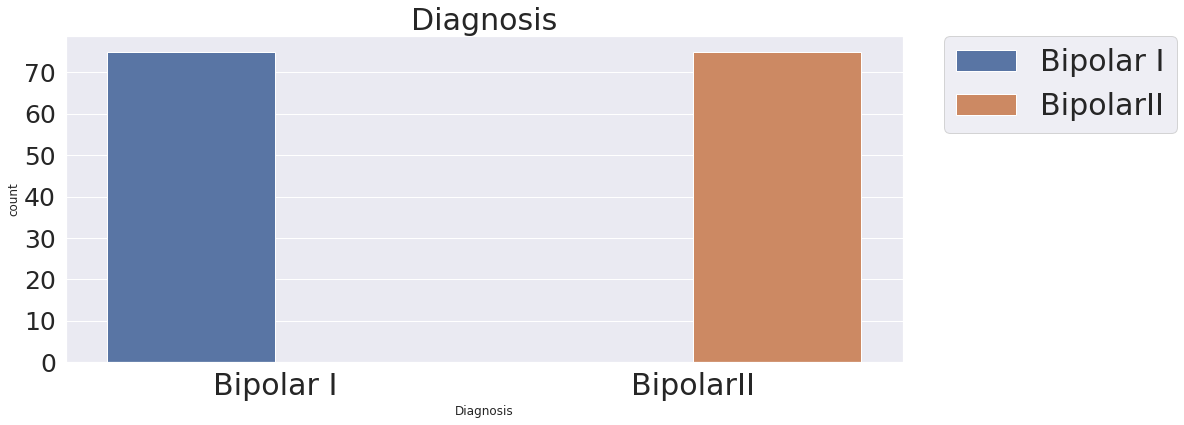

In [12]:
plt.figure(figsize=(15,6))
sns.countplot(x="Diagnosis",hue="Diagnosis",data=df,)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.title("Diagnosis",fontsize=30)

Text(0.5, 1.0, 'Mood Stabilizer')

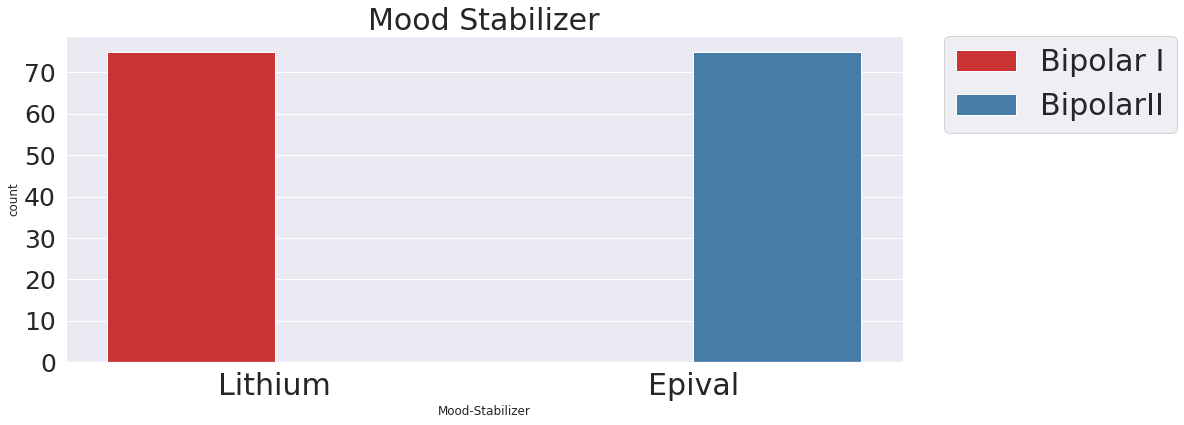

In [13]:
plt.figure(figsize=(15,6))
sns.countplot(x="Mood-Stabilizer",hue="Diagnosis",data=df,palette="Set1")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.title("Mood Stabilizer",fontsize=30)

Text(0.5, 1.0, 'Antipsychotic')

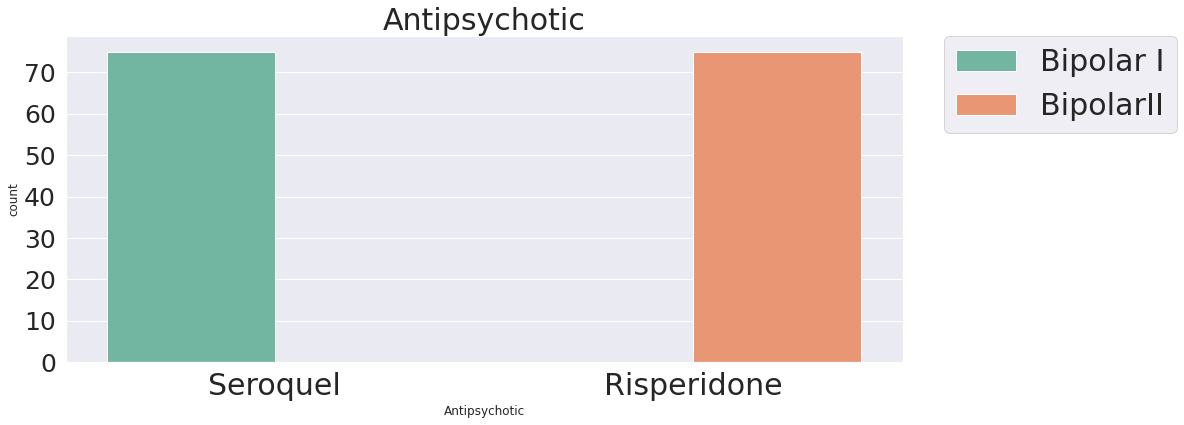

In [14]:
plt.figure(figsize=(15,6))
sns.countplot(x="Antipsychotic",hue="Diagnosis",data=df,palette="Set2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.title("Antipsychotic",fontsize=30)

Text(0.5, 1.0, 'Sleeping Pills')

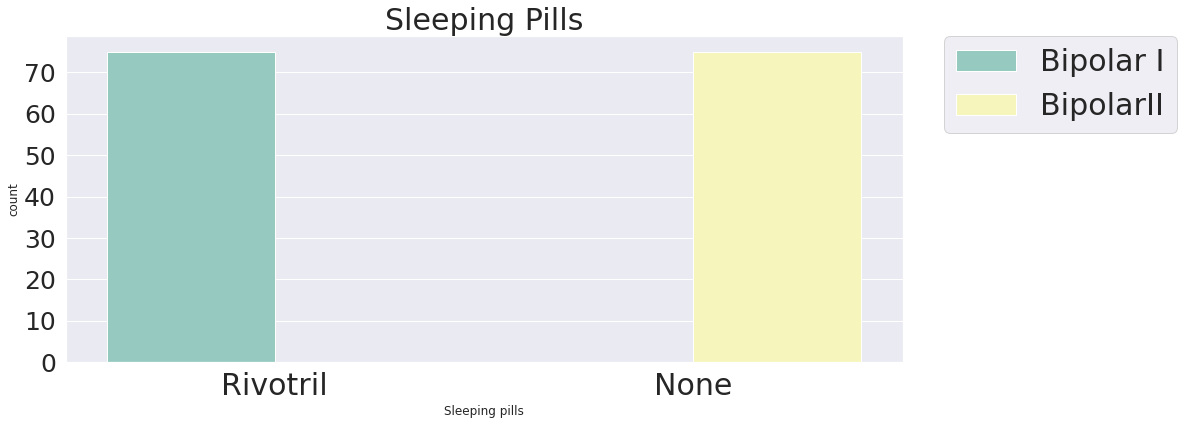

In [15]:
plt.figure(figsize=(15,6))
sns.countplot(x="Sleeping pills",hue="Diagnosis",data=df,palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.title("Sleeping Pills",fontsize=30)

In [16]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [17]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
df1 = df[['Cases','Diagnosis']]
df1.isnull().sum()

Cases        0
Diagnosis    0
dtype: int64

In [19]:
df1.head()

,Cases,Diagnosis
0,Patient displayed aggressive and violent behav...,Bipolar I
1,The patient exhibited aggressive and violent b...,Bipolar I
2,The patient had ADHD like systems and extremel...,Bipolar I
3,The patient lacks the attention span and obser...,Bipolar I
4,The patient showed several inability to focus ...,Bipolar I


In [20]:
df1.tail()

,Cases,Diagnosis
145,"The patient experienced extreme mood swings, c...",BipolarII
146,"The patient beat his family in a crazy frenzy,...",BipolarII
147,The patient was addicted to drugs in a manic p...,BipolarII
148,"The patient lived in isolation, playing video ...",BipolarII
149,The patient violently attacked a classmate dur...,BipolarII


In [21]:
    #lower casing
    df['Cases'] = df['Cases'].str.lower()

    #punctuation removal         
    df["Cases"] = df["Cases"].apply(lambda text: remove_punctuation(text))

In [22]:
df2=df1

In [23]:
X=list(df2['Cases'])
y=list(df2['Diagnosis'])

In [24]:
y

['Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'Bipolar I',
 'BipolarII',
 'BipolarII',
 'BipolarII',
 'BipolarII',
 'BipolarII',
 'BipolarII',
 'BipolarII',
 'BipolarII',
 'BipolarII',
 'BipolarII',
 'BipolarII',
 'BipolarII',
 'BipolarII',
 'BipolarII',
 'BipolarII',
 'BipolarII',
 'BipolarII',
 'BipolarII',
 'BipolarII',
 'BipolarII',
 'BipolarII',
 'Bipo

In [25]:

y=list(pd.get_dummies(y,drop_first=True)['BipolarII'])


In [26]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [27]:
len(y)

150

In [28]:
from sklearn.model_selection import train_test_split#stratify ensures balance between spam and no spam in test and train
xtrain, xtest, ytrain, ytest =train_test_split(X, y, 
                                random_state=2018, 
                                test_size=0.1, 
                                stratify=y)

In [29]:
!pip install transformers

In [30]:
from transformers import XLNetTokenizerFast
tokenizer = XLNetTokenizerFast.from_pretrained('xlnet-base-cased')

In [31]:
train_encodings = tokenizer(xtrain, truncation=True, padding=True)
test_encodings = tokenizer(xtest, truncation=True, padding=True)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [32]:
import torch

In [33]:
class NewsGroupsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor([self.labels[idx]])
        return item

    def __len__(self):
        return len(self.labels)
train_dataset = NewsGroupsDataset(train_encodings, ytrain)
valid_dataset = NewsGroupsDataset(test_encodings, ytest)

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  # calculate accuracy using sklearn's function
  acc = accuracy_score(labels, preds)
  recall=recall_score(labels,preds)
  precision1=precision_score(labels,preds)
  f1score=f1_score(labels,preds)
  return {
      'accuracy': acc,
      'recall': recall,
      'f1-score':f1score,
      'precision':precision1
  }

In [35]:
from transformers import XLNetForSequenceClassification

In [36]:
model = XLNetForSequenceClassification.from_pretrained('xlnet-base-cased', num_labels=2)

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.bias', 'lm_loss.weight']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

In [37]:
from transformers import TrainingArguments

In [38]:
from transformers import Trainer

In [39]:
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=50,              # total number of training epochs
    per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=20,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    load_best_model_at_end=True,     # load the best model when finished training (default metric is loss)
    # but you can specify `metric_for_best_model` argument to change to accuracy or other metric
    logging_steps=500,               # log & save weights each logging_steps
    evaluation_strategy="steps",     # evaluate each `logging_steps`
)

In [40]:
trainer = Trainer(
    model=model,                         # the instantiated Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=valid_dataset,          # evaluation dataset
    compute_metrics=compute_metrics,     # the callback that computes metrics of interest
)
trainer.train()

***** Running training *****
  Num examples = 135
  Num Epochs = 50
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 450


Step,Training Loss,Validation Loss




Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=450, training_loss=0.1266707526312934, metrics={'train_runtime': 214.4726, 'train_samples_per_second': 31.473, 'train_steps_per_second': 2.098, 'total_flos': 232856244126000.0, 'train_loss': 0.1266707526312934, 'epoch': 50.0})

In [41]:
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 15
  Batch size = 20


{'epoch': 50.0,
 'eval_accuracy': 0.8666666666666667,
 'eval_f1-score': 0.8571428571428571,
 'eval_loss': 1.4190120697021484,
 'eval_precision': 0.8571428571428571,
 'eval_recall': 0.8571428571428571,
 'eval_runtime': 0.1526,
 'eval_samples_per_second': 98.307,
 'eval_steps_per_second': 6.554}

In [42]:
def get_prediction(text):
    # prepare our text into tokenized sequence
    inputs = tokenizer(text, padding=True, truncation=True, max_length=max_length, return_tensors="pt").to("cuda")
    # perform inference to our model
    outputs = model(**inputs)
    # get output probabilities by doing softmax
    probs = outputs[0].softmax(1)
    # executing argmax function to get the candidate label
    return target_names[probs.argmax()]